In [ ]:
import numpy as np
import unyt
import swiftsimio as sw
from swiftsimio import load
import swiftgalaxy as sg
import functions as fn
from swiftgalaxy import SWIFTGalaxy, MaskCollection


In [2]:
x_dm=np.array([-1,1])
y_dm=np.array([0,0])
z_dm=np.array([0,0])
x_g=np.array([0,0])
y_g=np.array([0,0])
z_g=np.array([0,0])
print(dissociation(x_dm, y_dm, z_dm,x_g, y_g,z_g))

print(quadrupole(x_dm, y_dm,z_dm,2)*np.sqrt(4*np.pi/5))

NameError: name 'dissociation' is not defined

In [56]:
soap_dir="../../../mnt/su3-pro/colibre/L0012N0094/THERMAL_AGN/SOAP/"

data_h=sw.load(soap_dir+"/halo_properties_0127.hdf5")
xc=data_h.bound_subhalo.centre_of_mass[:,0]
yc=data_h.bound_subhalo.centre_of_mass[:,1]
zc=data_h.bound_subhalo.centre_of_mass[:,2]
radius=data_h.bound_subhalo.enclose_radius
boxsize=data_h.metadata.boxsize[0]

host_id=data_h.soap.host_halo_index#central halo=-1\
halo_id=np.arange(0,len(host_id),1)
mass=data_h.spherical_overdensity_200_crit.total_mass
data_h=[]

mainhalo_id=halo_id[(host_id==-1)*(mass>100)]


KeyboardInterrupt: 

In [57]:

x_dm=[[]]
y_dm=[[]]
z_dm=[[]]
x_g=[[]]
y_g=[[]]
z_g=[[]]
T=[[]]
for i in range(0, len(mainhalo_id)-1):
  
    x_dm.append([])
    x_g.append([])
    z_dm.append([])
    y_dm.append([])
    y_g.append([])
    z_g.append([])
    T.append([])


#get the coordinates of the dark matter and gas particles
for i in range (0,len(mainhalo_id)):
    id=mainhalo_id[i]
    mask=sw.mask(soap_dir+"colibre_with_SOAP_membership_0127.hdf5",spatial_only=False)
   
    mask.constrain_spatial([np.array([xc[id]-radius[id],xc[id]+radius[id]])*unyt.Mpc,
                           np.array([yc[id]-radius[id],yc[id]+radius[id]])*unyt.Mpc,
                           np.array([zc[id]-radius[id],zc[id]+radius[id]])*unyt.Mpc])
    
    mask.constrain_mask("gas","temperatures",35000,1e6)
    data=sw.load(soap_dir+"colibre_with_SOAP_membership_0127.hdf5",mask=mask)

    x_dm[i]=data.dark_matter.coordinates[:,0]
    y_dm[i]=data.dark_matter.coordinates[:,1]
    z_dm[i]=data.dark_matter.coordinates[:,2]
    x_g[i]=data.gas.coordinates[:,0]
    y_g[i]=data.gas.coordinates[:,1]
    z_g[i]=data.gas.coordinates[:,2]
    T[i]=data.gas.temperatures
    if xc[id]-radius[id]<0:
        mask=x_dm[i]>boxsize/2
        x_dm[i][mask]=x_dm[i][mask]-boxsize
        mask=x_g[i]>boxsize/2
        x_g[i][mask]=x_g[i][mask]-boxsize
    elif xc[id]+radius[id]>boxsize:
        mask=x_dm[i]<boxsize/2
        x_dm[i][mask]=x_dm[i][mask]+boxsize
        mask=x_g[i]<boxsize/2
        x_g[i][mask]=x_g[i][mask]+boxsize
    if yc[id]-radius[id]<0:
        mask=y_dm[i]>boxsize/2
        y_dm[i][mask]=y_dm[i][mask]-boxsize
        mask=y_g[i]>boxsize/2
        y_g[i][mask]=y_g[i][mask]-boxsize
    elif yc[id]+radius[id]>boxsize:
        mask=y_dm[i]<boxsize/2
        y_dm[i][mask]=y_dm[i][mask]+boxsize
        mask=y_g[i]<boxsize/2
        y_g[i][mask]=y_g[i][mask]+boxsize
    if zc[id]-radius[id]<0:
        mask=z_dm[i]>boxsize/2
        z_dm[i][mask]=z_dm[i][mask]-boxsize
        mask=z_g[i]>boxsize/2
        z_g[i][mask]=z_g[i][mask]-boxsize
    elif zc[id]+radius[id]>boxsize:
        mask=z_dm[i]<boxsize/2
        z_dm[i][mask]=z_dm[i][mask]+boxsize
        mask=z_g[i]<boxsize/2
        z_g[i][mask]=z_g[i][mask]+boxsize

#    z_g[i]=data.gas.coordinates[:,2]


KeyboardInterrupt: 

1613535 330539
206347 54078
1031491 156508
[0.13160334 0.10023626 0.1683942 ]


/home/jyang/anaconda3/envs/mypython/lib/python3.12/site-packages/swiftsimio/objects.py:273: RuntimeWarning: Mixing ufunc arguments with and without cosmo_factors, continuing assuming provided cosmo_factor (1 at a=0.9999999999999997) for all arguments.
  warnings.warn(


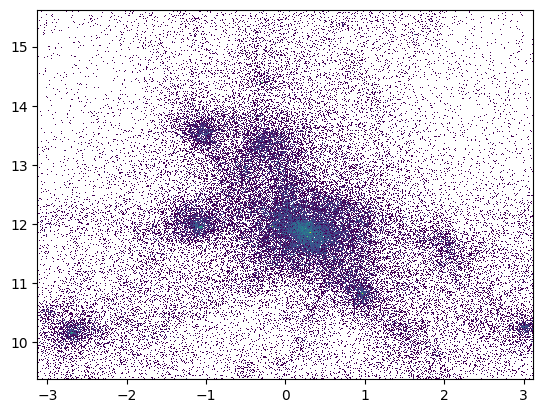

In [55]:
Offsets=np.zeros(len(mainhalo_id))
for i in range(0,len(mainhalo_id)):
    print(len(x_dm[i]),len(T[i]))
    mask=(T[i]<35000)
    xg=x_g[i]
    yg=y_g[i]
    zg=z_g[i]
    Offsets[i]=fn.offset(x_dm[i],y_dm[i],z_dm[i],xg,yg,zg)
#Halos can be at the edge of the box, so we need to check if the halo is at the edge of the box
print(Offsets)
import matplotlib.pyplot as plt
import matplotlib.colors as c
plt.close()
fig = plt.figure()
ax=plt.subplot(1,1,1)
h=ax.hist2d(x_g[0],y_g[0], bins=1000,norm=c.LogNorm())
#ax.set_xlabel("S")
#ax.set_ylabel("Counts")
##ax.set_title("M>10^10")
#f#\ig.savefig("/home/jyang/plot/Colibre/L0012N0094/S.png")

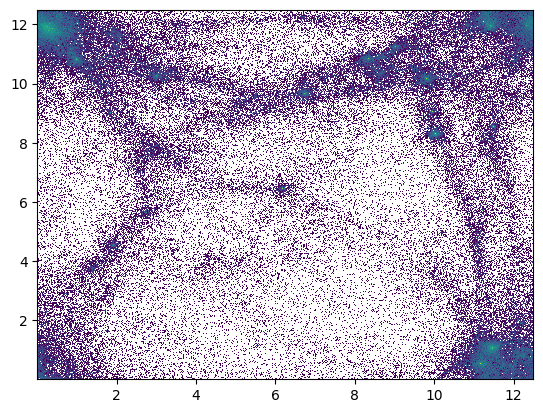

In [8]:
fig = plt.figure()
ax=plt.subplot(1,1,1)
h=ax.hist2d(x,y, bins=1000,norm=c.LogNorm())

/home/jyang/anaconda3/envs/mypython/lib/python3.12/site-packages/swiftsimio/objects.py:273: RuntimeWarning: Mixing ufunc arguments with and without cosmo_factors, continuing assuming provided cosmo_factor (1 at a=0.9999999999999997) for all arguments.
  warnings.warn(


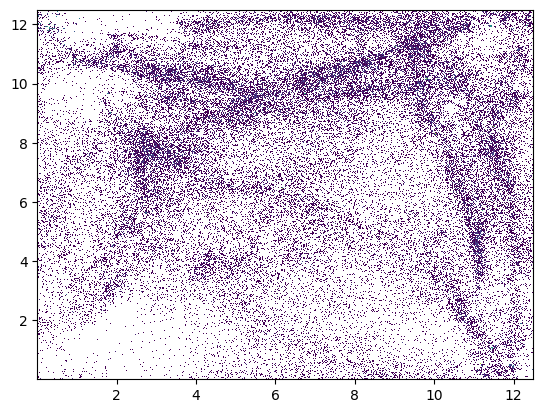

In [9]:
fig = plt.figure()
ax=plt.subplot(1,1,1)
h=ax.hist2d(x[T<35000],y[T<35000], bins=1000,norm=c.LogNorm())

In [40]:
for i in range(0,len(mainhalo_id)):
  print(i)
  sga=sg.SWIFTGalaxy(soap_dir+"colibre_with_SOAP_membership_0127.hdf5",
    sg.SOAP(soap_dir+"/halo_properties_0127.hdf5",soap_index=mainhalo_id[i]))#,extra_mask=None))
  analyse(sga,i)
#calculate the dissociation
S=[]
for i in  range(0,len(x_dm)):
      x_dmc=np.sum(x_dm[i])/len(x_dm[i])
      x_gc=np.sum(x_g[i])/len(x_g[i])
      x_dm[i]-=x_dmc
      x_g[i]-=x_gc
      y_dmc=np.sum(y_dm[i])/len(y_dm[i])
      y_dm[i]-=y_dmc
      y_gc=np.sum(y_g[i])/len(y_g[i])
      y_g[i]-=y_gc
      z_dmc=np.sum(z_dm[i])/len(z_dm[i])
      z_dm[i]-=z_dmc
      z_gc=np.sum(z_g[i])/len(z_g[i]) 
      z_g[i]-=z_gc
      S.append(dissociation(x_dm[i], y_dm[i], z_dm[i],x_g[i], y_g[i],z_g[i]))

0
1
2


In [41]:
print(S)

[np.float64(-0.013213080378536697), np.float64(-0.1068340333307283), np.float64(-0.13813231145497773)]
